### Линейные методы в машинном обучении

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b $$,
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x> $$,
где $<\cdot, \cdot>$ -- скалярное произведение векторов.

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw $$,
Y -- вектор размера n, X -- матрица объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает 
$$ w = (X^TX)^{-1}X^TY $$

#### Задание 1

Реализуйте линейную регрессию, которая вычисляет веса признаков по формуле указанной выше

In [4]:
class MyLinearRegression:
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!
        
        # ВАШ КОД ЗДЕСЬ
        n = X.shape[0]
        X = np.hstack((X, np.ones((n, 1))))
        self.w = (np.linalg.inv(np.dot(X.T, X)) @ X.T) @ y
        
    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        
        # ВАШ КОД ЗДЕСЬ
        n = X.shape[0]
        X = np.hstack((X, np.ones((n, 1))))
        y_pred = np.dot(X, self.w)
        return y_pred
    
    def get_weights(self):
        return self.w

Протестируем нашу модель на искуственных данных

In [9]:
X = np.linspace(-5, 5, 100)
y = 10 * X - 7

X_train = (X[0::2]).reshape(-1, 1)
y_train = y[0::2] + np.random.randn(50) * 10

X_test = (X[1::2]).reshape(-1, 1)
y_test = y[1::2] + np.random.randn(50) * 10

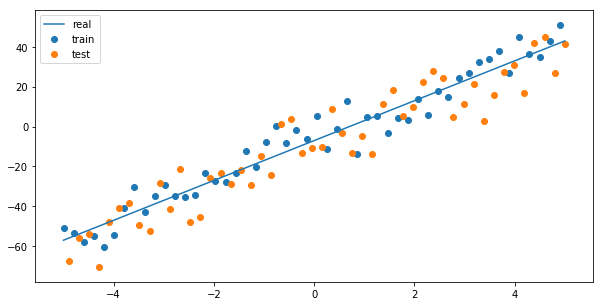

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

#### Задание 2

Обучите вашу модель на тренировочной выборке и предскажите значения на тесте.
Предсказанные ответы сохраните в переменную $\textbf{predictions}$, а веса модели сохраните в переменную $\textbf{w}$

In [11]:
regressor = MyLinearRegression()

# Ваш код здесь
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
w = regressor.get_weights()

Визуализируем предсказания

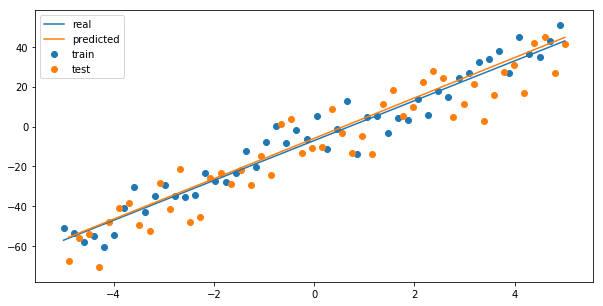

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w[:-1]) + w[-1], label='predicted')
plt.legend()
plt.show()

#### Задание 3

Вычислите среднеквадратичную ошибку на трейне и на тесте.
Какие результаты вы ожидаете получить? Какие получились? Почему?

In [13]:
from sklearn.metrics import mean_squared_error

# ВАШ КОД ЗДЕСЬ
train_predictions = regressor.predict(X_train)

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, predictions))

Train MSE:  47.06212918321362
Test MSE:  113.00596973259916


### Ridge&Lasso

На практике точные формулы для подсчета коэффициентов линейной регрессии не используются, а используется метод градиентного спуска который состоит в подсчете производных от ошибки и шагу в направлении наискорейшего убывания функции (напомню, что мы стремимся минимизировать функцию потерь). Эти методы работают быстрее, чем точное вычисление обратных матриц и их перемножение.
Более того, во многих задачах это единственный способ обучить модель, так как не всегда (на самом деле почти никогда) удается выписать точную формулу для минимума сложного функционала ошибки.

Давайте рассмотрим реализации линейных регрессоров в библиотеке sklearn

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Будем работать с датасетом wine

In [15]:
from sklearn.datasets import load_wine

In [16]:
wine_data = load_wine()

In [17]:
X = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
y = wine_data['target']

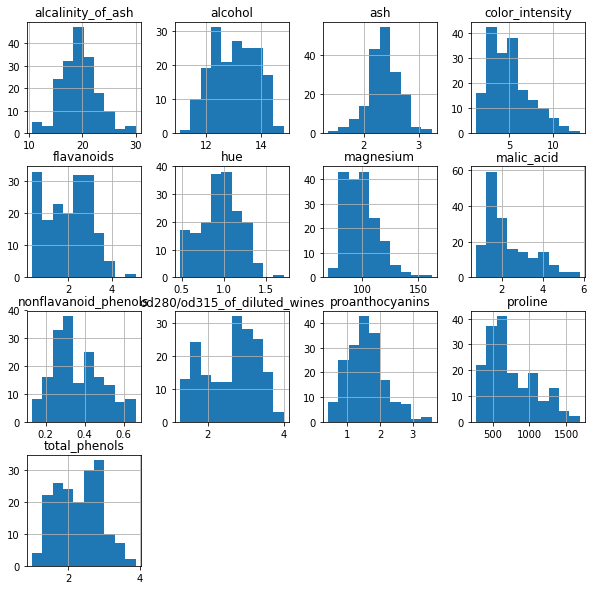

In [18]:
_ = X.hist(X.columns, figsize=(10, 10))

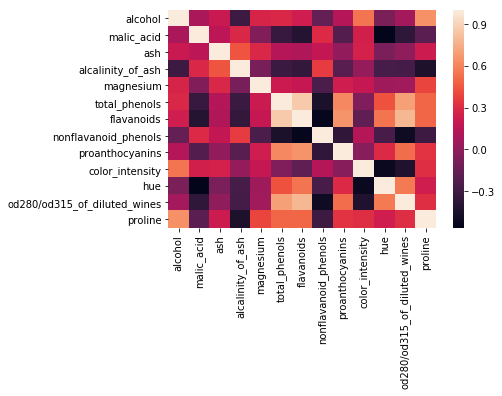

In [19]:
import seaborn as sns

sns.heatmap(X.corr())

#### Задание 4

Разбейте выборку на train и test в соотношении 70/30.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Выполним нормировку данных

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Задание 5

Обучите линейную регрессию и подсчитайте качество на тесте

In [22]:
regressor = LinearRegression()

# ВАШ КОД ЗДЕСЬ
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, predictions))

test mse:  0.07932945988011844


Визуализируем получившиеся веса

<Container object of 13 artists>

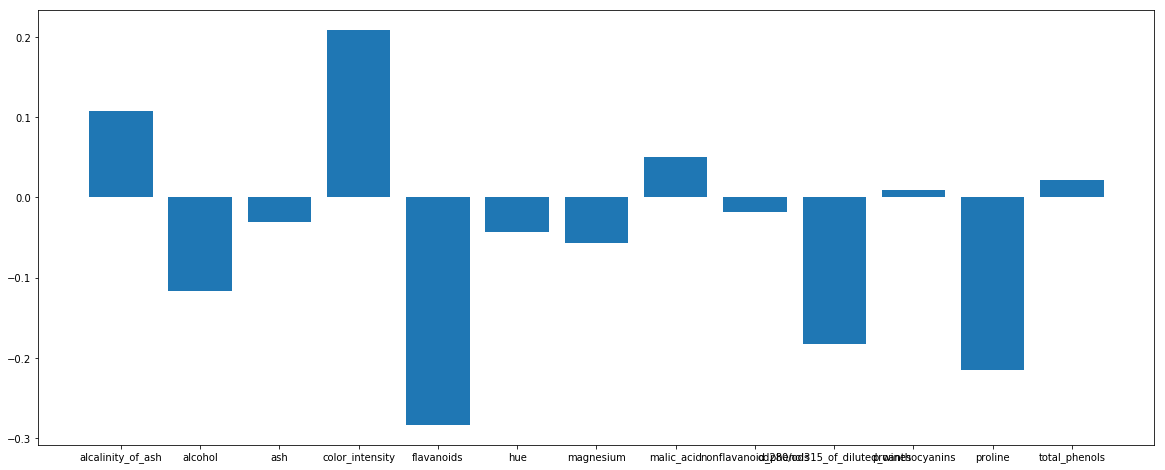

In [23]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, regressor.coef_)

Теперь обратимся к методам с регуляризацией.

Ridge (L2-регуляризация) сильно штрафует за слишком большие веса и не очень за малые. При увеличении коэффициента перед регуляризатором веса меняются плавно

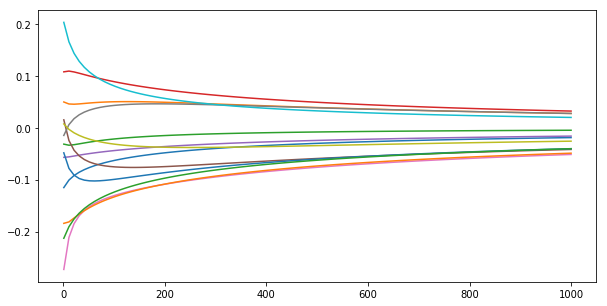

In [25]:
alphas = np.linspace(1, 1000, 100)

plt.figure(figsize=(10, 5))
weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.show()

Lasso одинаково сильно штрафует малые и большие веса, поэтому при достаточно большом коэффициенте регуляризации многие признаки становятся равными нулю, при этом остаются только наиболее инфромативные. Этот факт можно использовать для решения задачи отбора признаков.

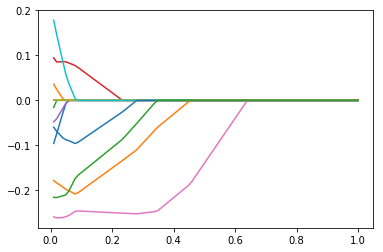

In [26]:
alphas = np.linspace(0.01, 1, 100)

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.show()

In [28]:
lasso_regression = Lasso(0.3)
lasso_regression.fit(X_train, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
X.columns[np.abs(lasso_regression.coef_) > 0]

Index(['flavanoids', 'od280/od315_of_diluted_wines', 'proline'], dtype='object')

#### Задание 6

Обучите модели Ridge и Lasso и подсчитайте ошибку на тесте. Постарайтесь подобрать лучшие параметры регуляризации

In [37]:
# ВАШ КОД ЗДЕСЬ
from sklearn.model_selection import GridSearchCV

searcher = GridSearchCV(Lasso(), {'alpha': np.logspace(-3, -1, 10)}, cv=5)
searcher.fit(X_train, y_train)
searcher.best_params_

predictions = searcher.predict(X_test)
print(mean_squared_error(y_test, predictions))

0.07851258379452862


In [41]:
# ВАШ КОД ЗДЕСЬ
from sklearn.model_selection import GridSearchCV

searcher = GridSearchCV(Ridge(), {'alpha': np.logspace(0, 2, 100)}, cv=5)
searcher.fit(X_train, y_train)
searcher.best_params_


predictions = searcher.predict(X_test)
print(mean_squared_error(y_test, predictions))

0.08736128707292894


#### Линейные методы классификации

Рассмотрим работу алгоритмов линейной классификации для задачи breast cancer

In [42]:
from sklearn.datasets import load_breast_cancer

In [43]:
data = load_breast_cancer()

In [44]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [45]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [47]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


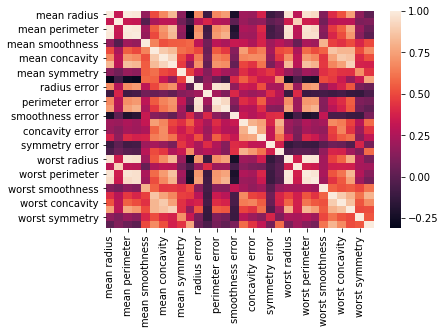

In [48]:
sns.heatmap(X.corr())

Первый метод -- логистическая регрессия. Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу

#### Задание 7

Разбейте выборку на трейн и тест в соотношении 4:1. Обучите модель и предскажите вероятности классов 0 и 1 (это можно сделать с помощью метода $\textbf{predict_proba}$)

In [51]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# ВАШ КОД ЗДЕСЬ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

predictions = clf.predict_proba(X_test)

In [52]:
predictions.shape

(114, 2)

In [55]:
predictions[20, 0]

0.003438346332464426

Подсчитаем accuracy и roc-auc наших предсказаний

In [56]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [62]:
accuracy_score(y_test, predictions[:, 1] > 0.5)

0.9385964912280702

In [63]:
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

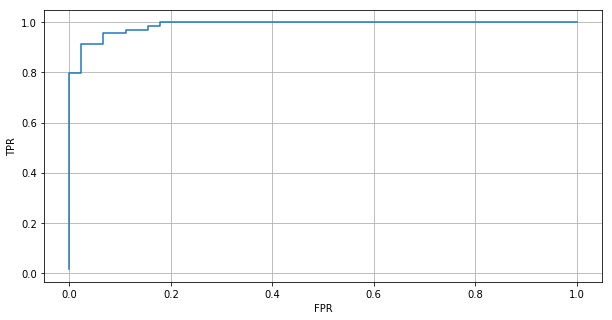

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [65]:
auc

0.9880837359098229

#### Задание 8

Обучите линейный SVM и подсчитайте точность его предсказаний на тесте. Подсчитайте и ROC-AUC. Что можно сказать про эти результаты?

Замечание: чтобы создать классический линейный SVM нужно в качестве параметра в конструктор передать kernel="linear"

In [66]:
from sklearn.svm import SVC

In [67]:
#### ВАШ КОД ЗДЕСЬ
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print('accuracy: ', accuracy_score(y_test, predictions))
print('auc: ', roc_auc_score(y_test, predictions))

accuracy:  0.9473684210526315
auc:  0.9410628019323671


SVM очень мощный алгоритм и долгое время он использовался почти во всех областях как основной инструмент для построения систем искуственного интеллекта (прямо как нейросети сейчас).

Однако его мощь приносит и немало слабостей. В частности он оказывается довольно чувствительным к шуму в данных и наличию несбалинсированности в классах.

Один из способов побороть вторую проблему -- давать бОльшие веса тем объектам, которых в выборке встречается меньше, тогда при обучении оба класса будут иметь одинаковый вклад в функцию потерь и модель будет обучаться лучше.

#### Задание 8

Разберитесь какой аргумент нужно передать в конструктор, чтобы модель боролась с несбалансированностью классов и обучите ее. Получилось ли улучшить качество?

In [68]:
#### ВАШ КОД ЗДЕСЬ 
clf = SVC(kernel='linear', class_weight='balanced')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print('accuracy: ', accuracy_score(y_test, predictions))

accuracy:  0.9649122807017544


#### Задание 9

Побороть шум и улучшить сходимость модели помогает нормировка признаков. Выполните ее и обучите предыдущую модель.

In [ ]:
#### ВАШ КОД ЗДЕСЬ

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print('accuracy: ', accuracy_score(y_test, predictions))

accuracy:  0.9736842105263158
